<a href="https://colab.research.google.com/github/nhjoy/ANN-Function-Approx/blob/main/Cosine_Trigonometric_Function_Approximator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies and settings

In [5]:
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import math
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix

2022-01-07 19:26:57.152378: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-07 19:26:57.152459: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
# version check
!python --version
print('Numpy ' + np.__version__)
print('TensorFlow ' + tf.__version__)
print('Keras ' + tf.keras.__version__)


Numpy 1.21.5
TensorFlow 2.7.0
Keras 2.7.0


In [7]:
# trigonometric function settings

sample_num = 1000 # number of sample
val_ratio = 0.2 # 20% of total sample as validation set
test_ratio = 0.2 # 20% of total sample as test set
tf_model_name = 'sinosoidal'


# Random function generation with noise

In [8]:
# random sample generation

np.random.seed(1234)
total_size = sample_num
x_val = np.random.uniform(low = (-2*math.pi), high = (2*math.pi), size = total_size)
np.random.shuffle(x_val)

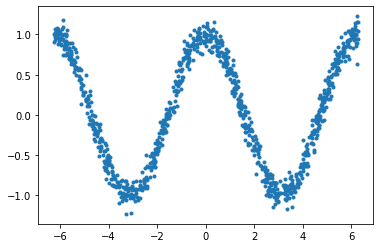

In [9]:
# noisy Cosine wave generator
y_val = np.cos(x_val) + (0.1 * np.random.randn(x_val.shape[0]))
plt.plot(x_val, y_val, '.');


# Training, Validation, and Test sets

In [10]:
# dataset split into training, validation, and test sets

val_split = int(val_ratio * sample_num)
test_split = int(val_split + (test_ratio * sample_num))
x_val, x_test, x_train = np.split(x_val, [val_split, test_split])
y_val, y_test, y_train = np.split(y_val, [val_split, test_split])

# Check that our splits add up correctly
assert(x_train.size + x_val.size + x_test.size) == sample_num

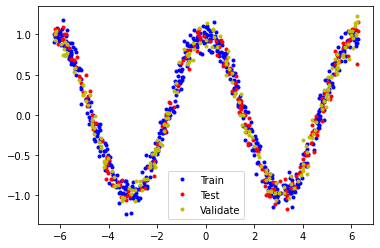

In [11]:
# visualization of training, validation, and test sets
plt.figure(1)
plt.plot(x_train, y_train, 'b.', label = 'Train')
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")
plt.legend()
plt.show()



# ANN Model

In [12]:
# model creation
model = tf.keras.Sequential()
model.add(layers.Dense(8, activation = 'relu', input_shape=(1,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 16        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


2022-01-07 19:27:04.379375: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-01-07 19:27:04.379597: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-07 19:27:04.379687: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-01-07 19:27:04.379751: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-01-07 19:27:04.400680: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

# Training

In [13]:
# Add optimizer, loss function, and metrics to model and compile it
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Training model
history = model.fit(x_train, y_train, epochs=500, batch_size=100, validation_data=(x_val, y_val), verbose=0)


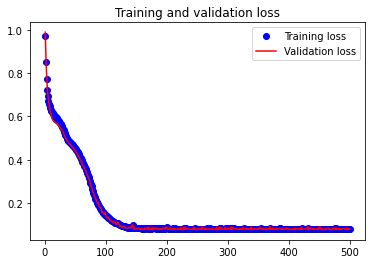

In [14]:
# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

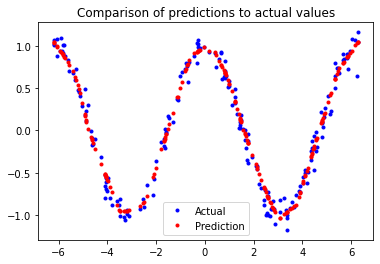

In [15]:
# Plot predictions against actual values
predictions = model.predict(x_test)

plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Prediction')
plt.legend()
plt.show()